# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('gym_members_exercise_tracking_synthetic_data.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [4]:
df.describe()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [5]:
df.isnull().sum()

,0
Age,10
Gender,71
Weight (kg),22
Height (m),26
Max_BPM,21
Avg_BPM,30
Resting_BPM,19
Session_Duration (hours),23
Calories_Burned,23
Workout_Type,61


In [6]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

In [8]:
numeric_features = df[less].select_dtypes(include=['number']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())


In [9]:
kategorical_features = df[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
  df[column] = df[column].fillna(df[column].mode()[0])

In [10]:
df = df.drop(columns=over)

In [11]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [36]:
df.isnull().sum()

,0
Age,0
Weight (kg),0
Height (m),0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Fat_Percentage,0
Water_Intake (liters),0
Workout_Frequency (days/week),0


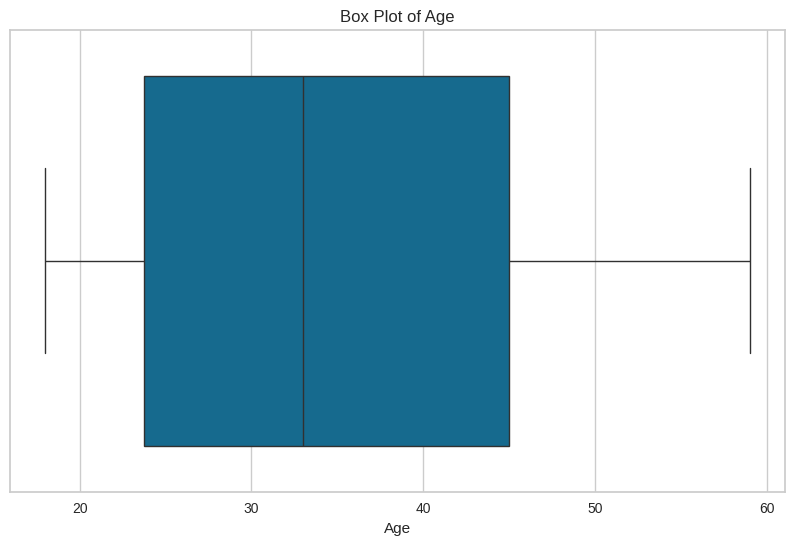

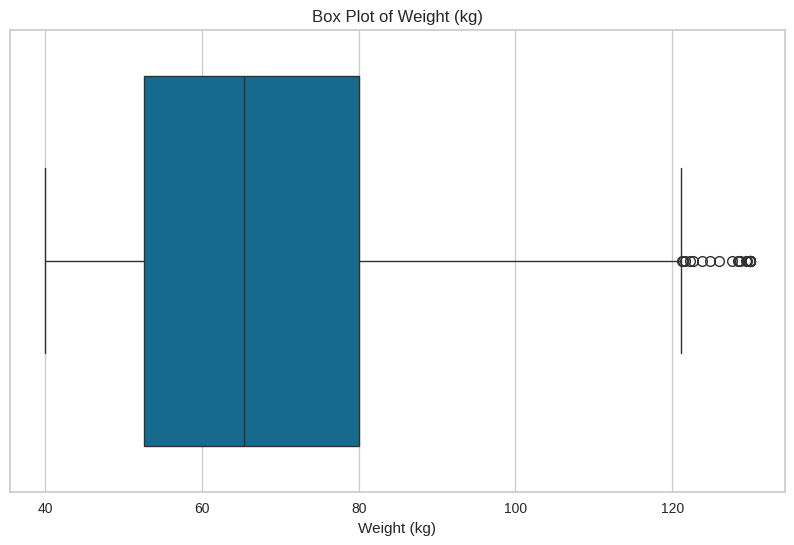

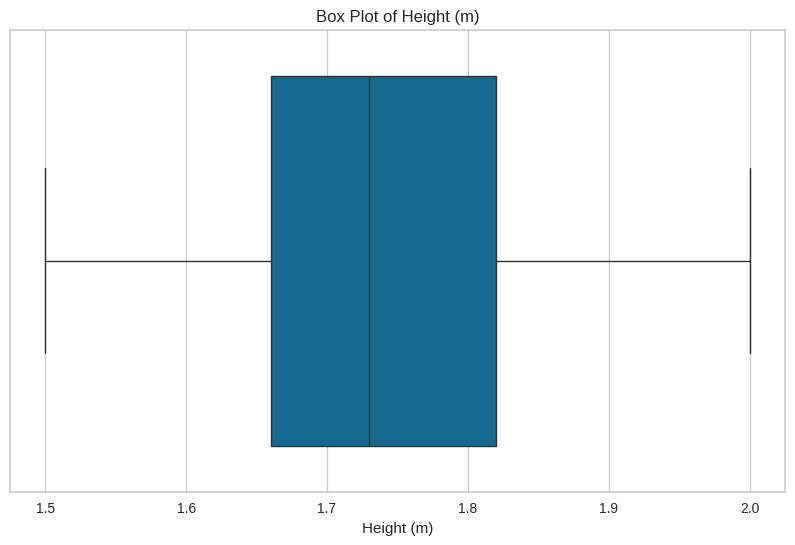

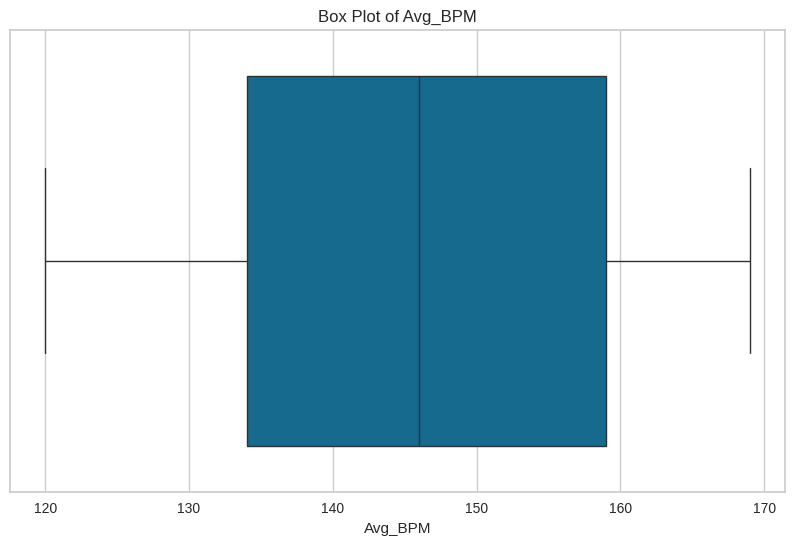

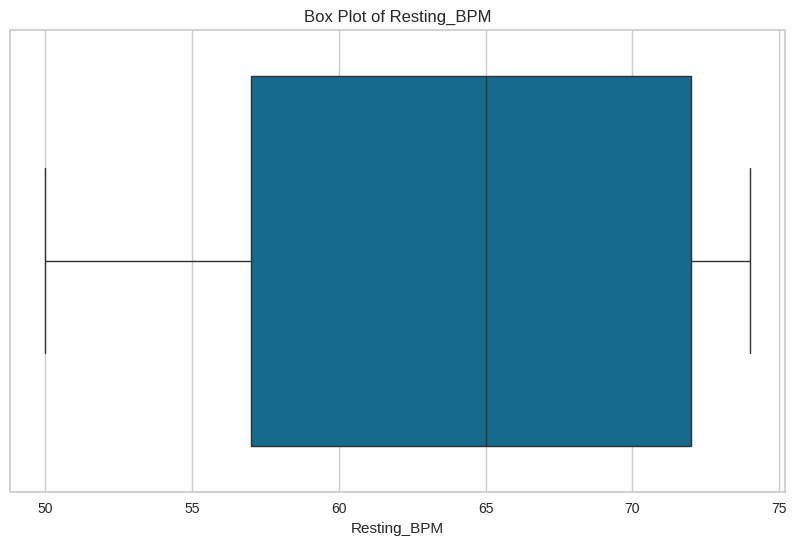

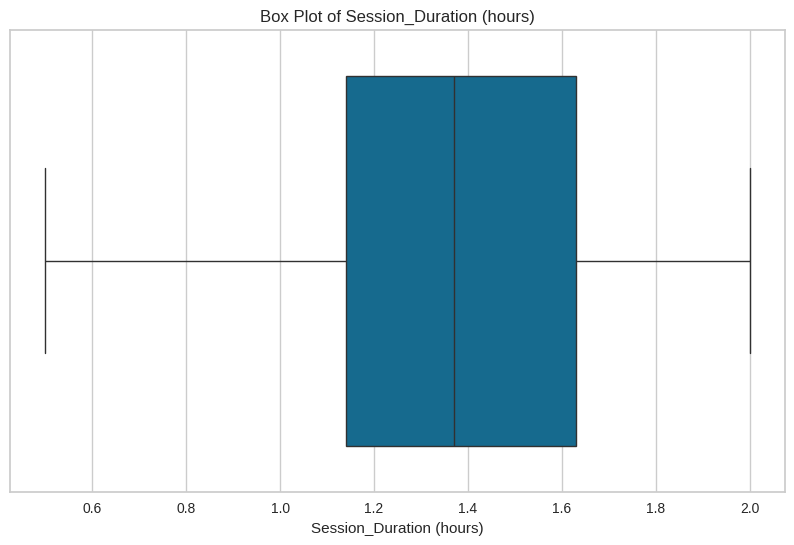

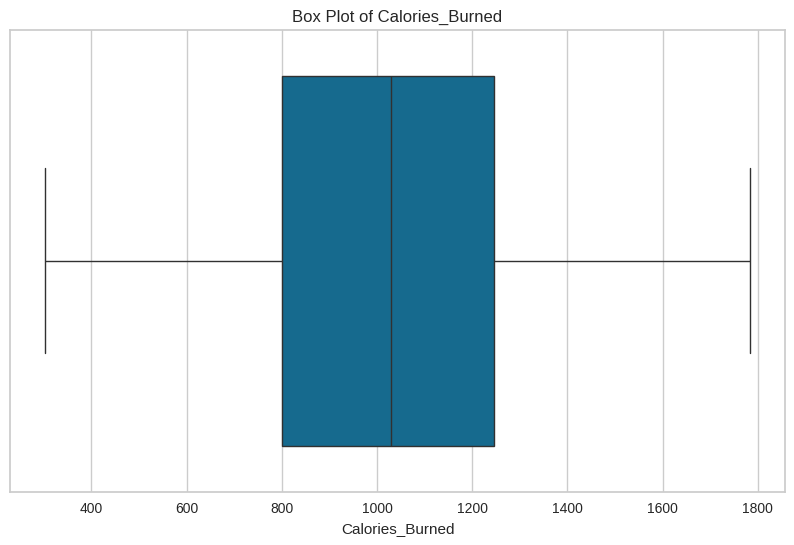

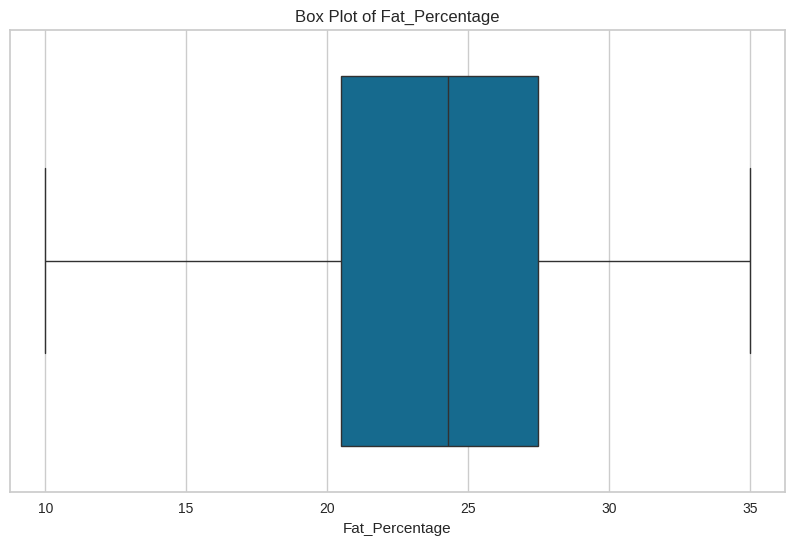

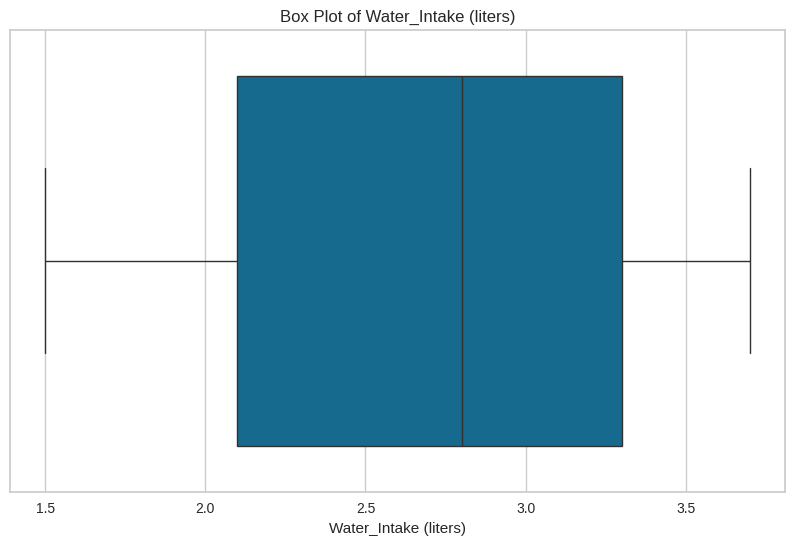

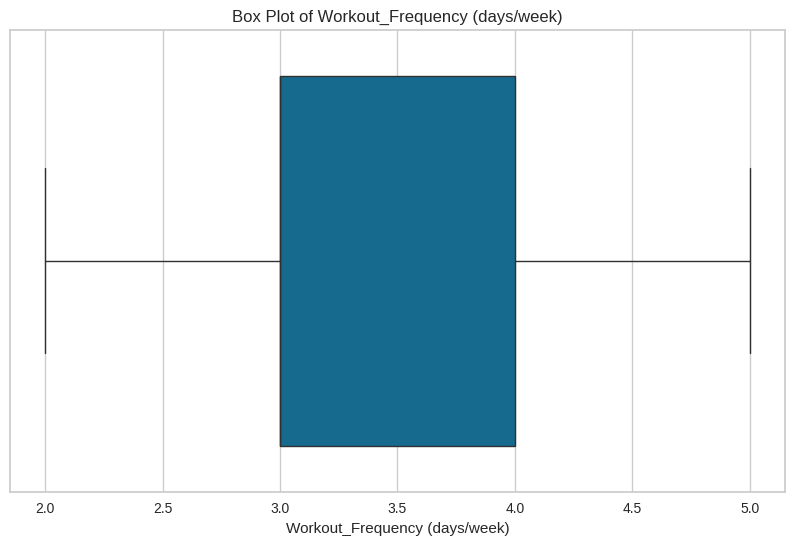

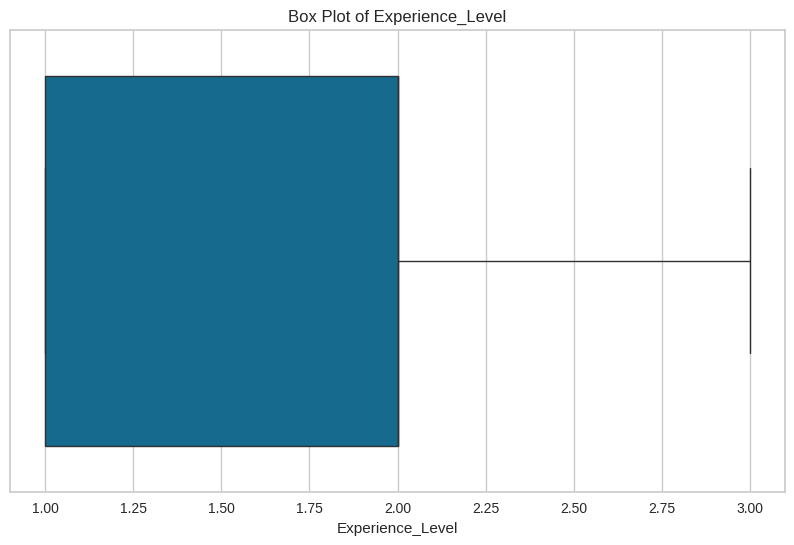

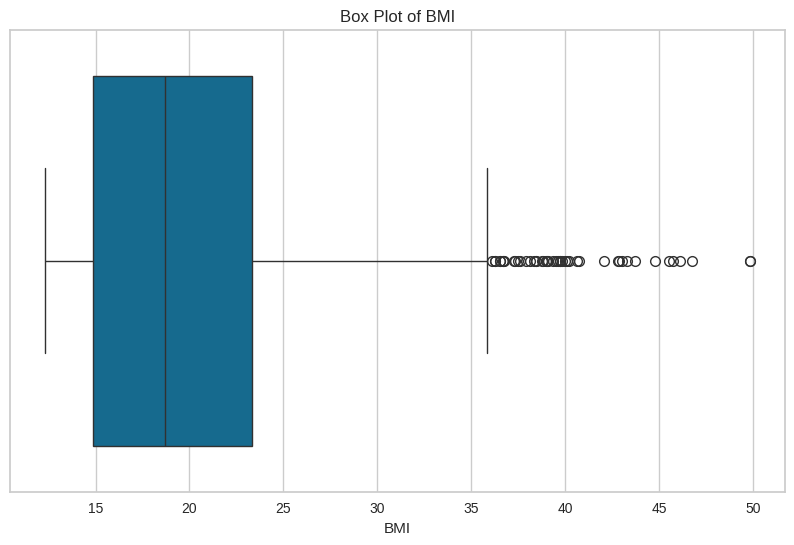

In [12]:
for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [14]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]
# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

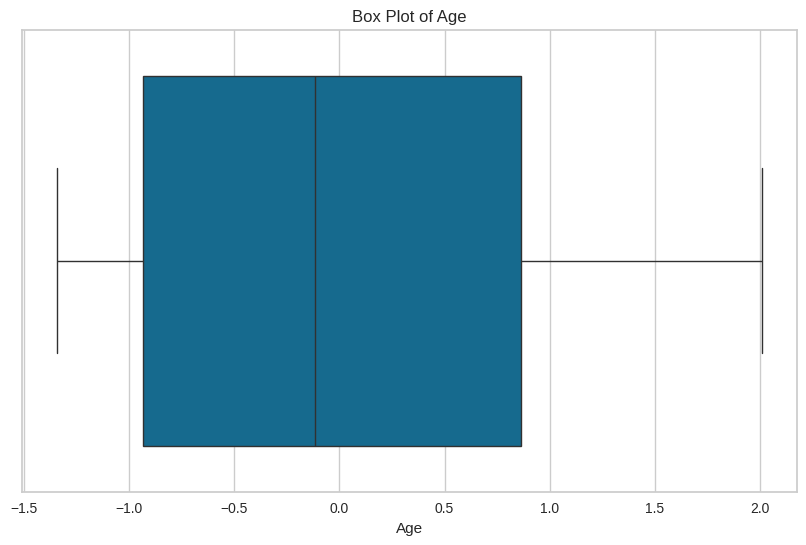

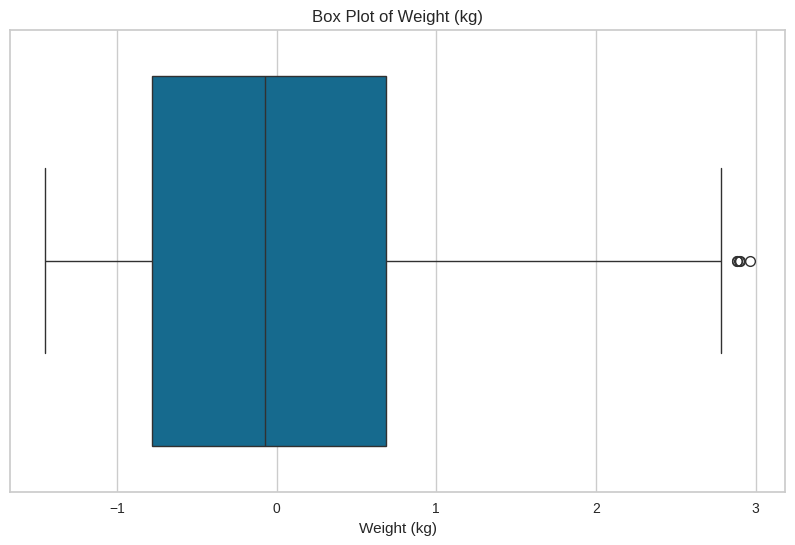

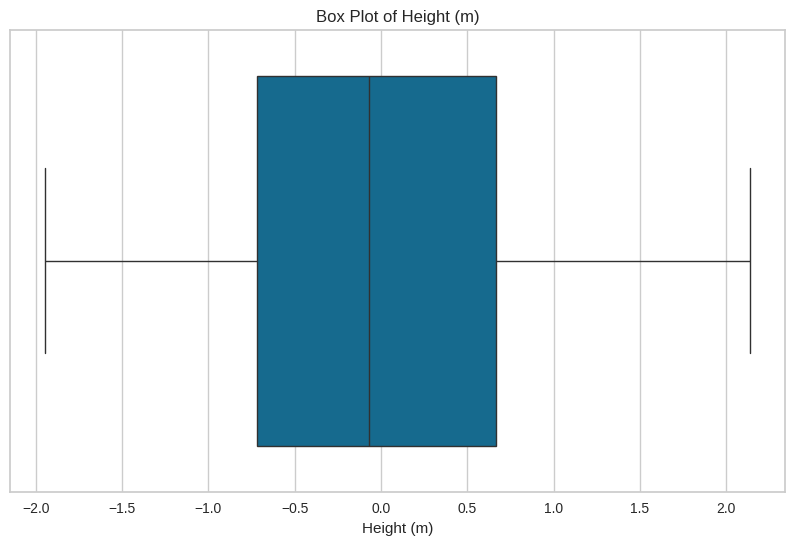

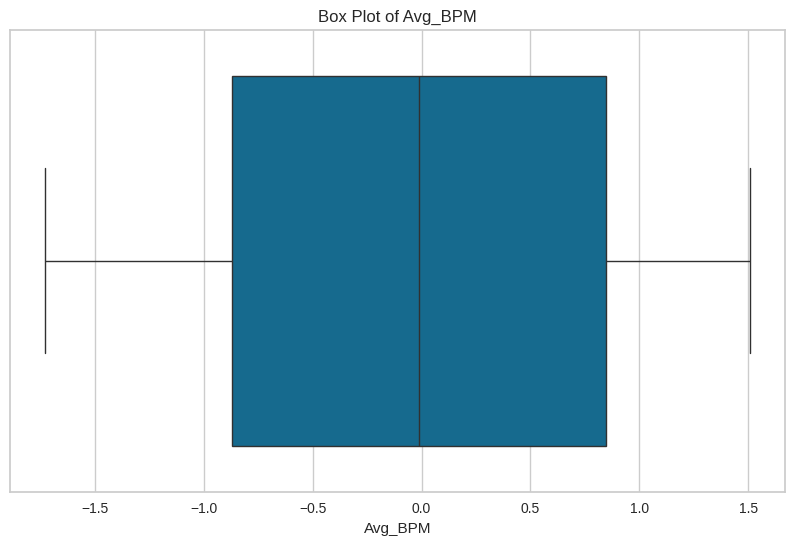

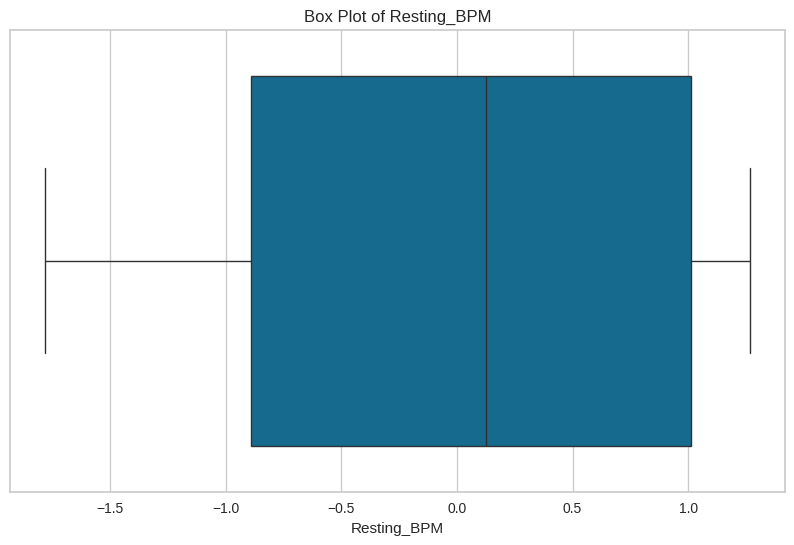

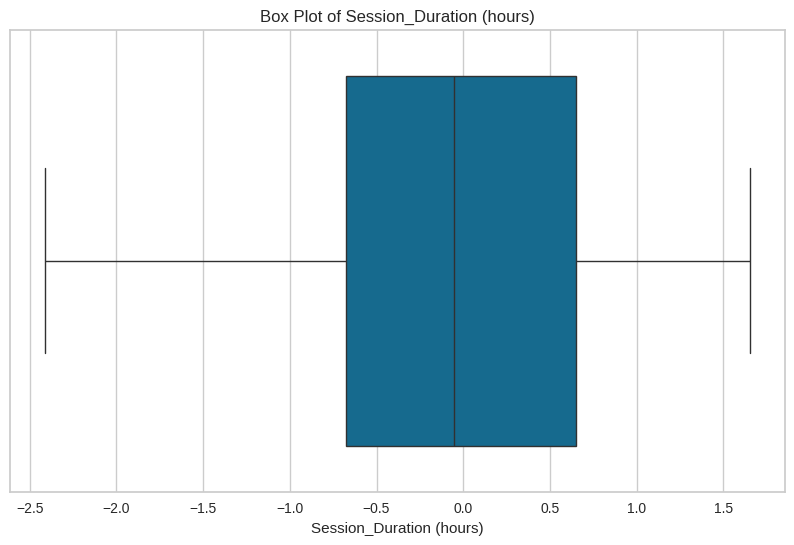

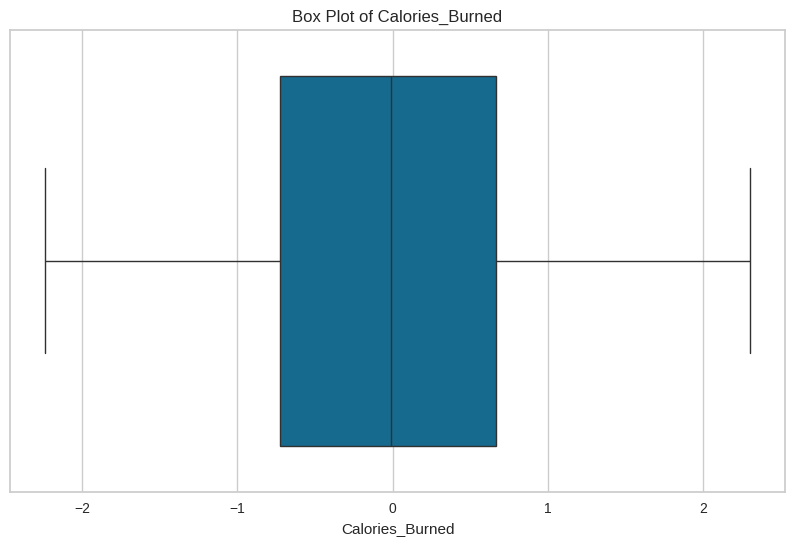

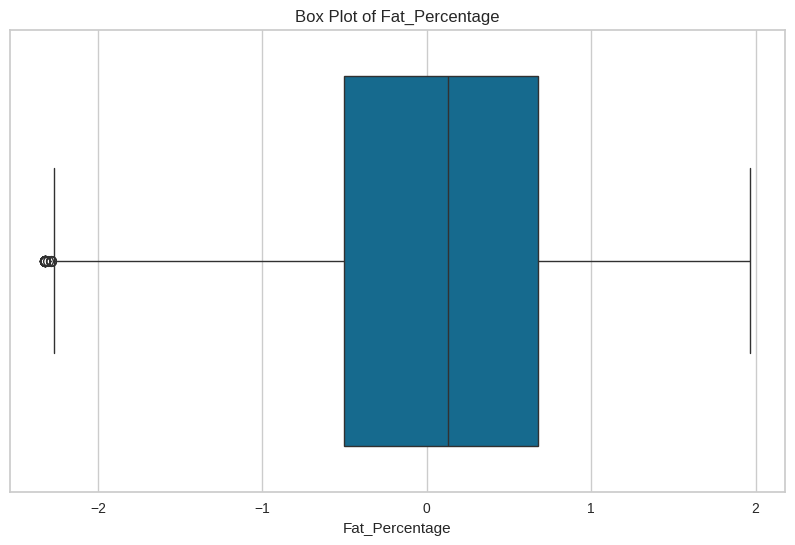

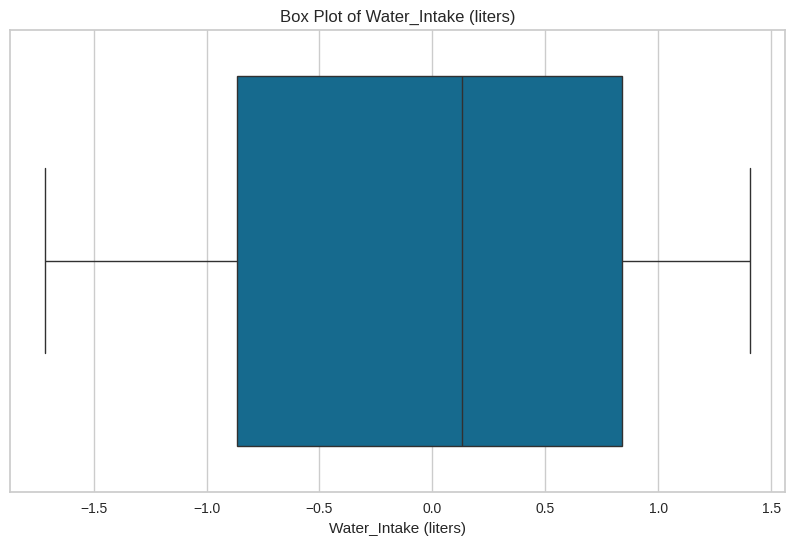

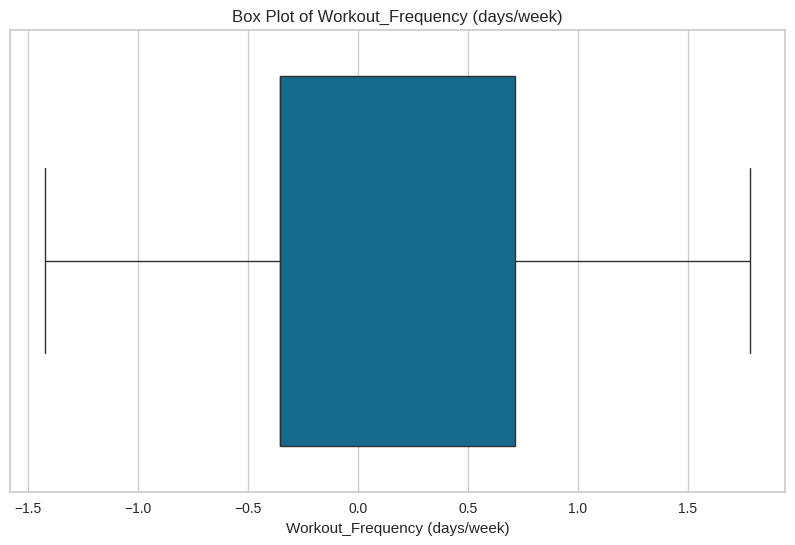

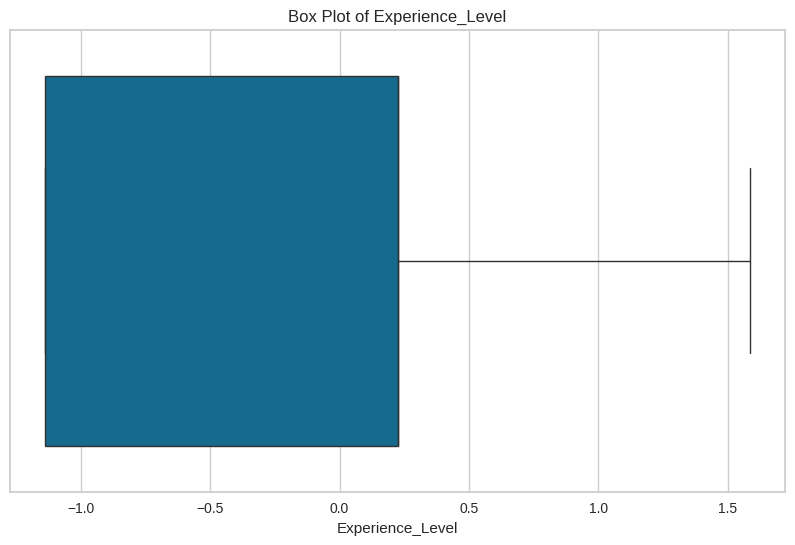

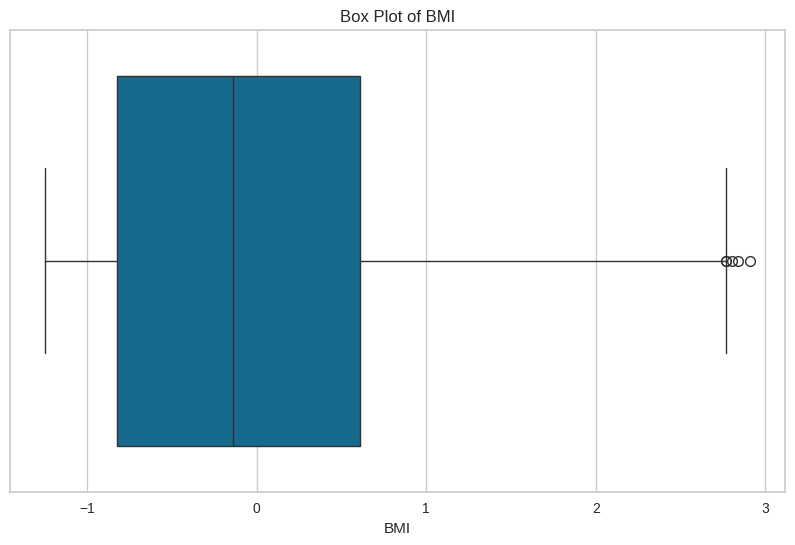

In [35]:
for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

In [16]:
# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

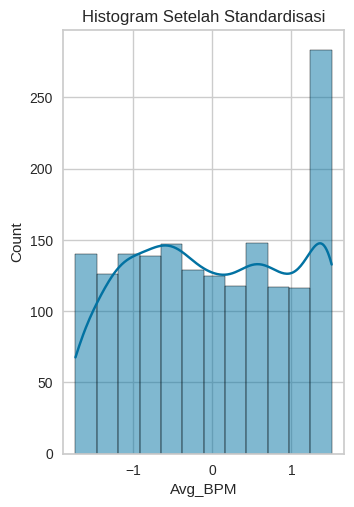

In [17]:
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [18]:
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Age, Weight (kg), Height (m), Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI, Gender, Max_BPM, Workout_Type]
Index: []


In [19]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,Gender,Max_BPM,Workout_Type
0,Female,174,Strength
1,Female,166,Strength
2,Male,187,Cardio
3,Female,187,Cardio
4,Female,177,Strength
...,...,...,...
1794,Female,162,Yoga
1796,Male,164,HIIT
1797,Male,188,Strength
1798,Male,180,Cardio


In [20]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
  df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder


,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Max_BPM,Workout_Type
0,-0.035152,1.091571,0.994106,0.384736,1.266059,-0.731206,-0.984101,-1.841483,-0.438060,1.782195,0.223870,-0.895092,0,14,2
1,-0.688302,0.982713,0.749147,0.648923,1.139167,-1.056193,-0.613287,0.747444,0.129169,1.782195,0.223870,2.488533,0,6,2
2,-1.014877,-0.100423,0.912453,1.309388,-0.002864,-0.406219,1.976278,0.884605,-1.147097,-0.354955,0.223870,-1.173827,1,27,0
3,1.597722,0.471081,0.667494,1.507528,-0.764218,0.162509,-1.241525,1.416107,-0.438060,0.713620,-1.138269,0.173978,0,27,0
4,-0.035152,-0.753570,0.014270,1.507528,0.250921,0.568744,0.774965,0.490266,0.696399,0.713620,0.223870,0.255129,0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.128135,0.770440,-0.230688,1.111249,1.266059,1.272883,-0.407961,-0.709899,-1.005289,-1.423530,0.223870,-1.207345,0,2,3
1796,1.434435,0.960941,-0.393994,1.507528,-1.271787,-1.679086,1.023196,1.553268,0.270977,-0.354955,0.223870,-0.753961,1,4,1
1797,1.026216,0.188051,0.830800,-1.134334,0.377813,-0.514548,0.698351,0.833170,-0.296253,-0.354955,0.223870,-0.245888,1,28,2
1798,0.046492,-0.944071,-0.230688,0.384736,1.139167,-0.947864,-0.236345,1.604704,-1.430712,0.713620,1.586009,-1.187940,1,20,0


In [22]:
X = df.iloc[:, [9, 10]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Workout_Frequency (days/week)', 'Experience_Level']))


      Workout_Frequency (days/week)  Experience_Level
0                          1.782195          0.223870
1                          1.782195          0.223870
2                         -0.354955          0.223870
3                          0.713620         -1.138269
4                          0.713620          0.223870
...                             ...               ...
1723                      -1.423530          0.223870
1724                      -0.354955          0.223870
1725                      -0.354955          0.223870
1726                       0.713620          1.586009
1727                       0.713620         -1.138269

[1728 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

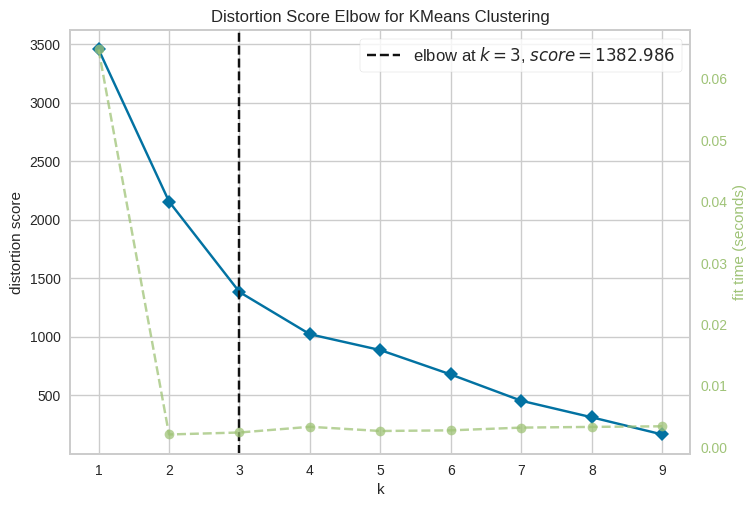

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [24]:

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 6

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
  print("Analisis Karakteristik Setiap Cluster:")
  for cluster_id in range(k):
    # Mengambil data untuk cluster saat ini
    cluster_data = X[labels == cluster_id]

    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_income = cluster_data[:, 0].mean() # Rata-rata Annual Income
    mean_spending = cluster_data[:, 1].mean() # Rata-rata Spending Score

    print(f"\nCluster {cluster_id + 1}:")
    print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
    print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income (k$): -0.78
Rata-rata Spending Score (1-100): 0.22

Cluster 2:
Rata-rata Annual Income (k$): 1.18
Rata-rata Spending Score (1-100): 0.12

Cluster 3:
Rata-rata Annual Income (k$): -0.22
Rata-rata Spending Score (1-100): -1.14

Cluster 4:
Rata-rata Annual Income (k$): -0.31
Rata-rata Spending Score (1-100): 1.59

Cluster 5:
Rata-rata Annual Income (k$): nan
Rata-rata Spending Score (1-100): nan

Cluster 6:
Rata-rata Annual Income (k$): nan
Rata-rata Spending Score (1-100): nan


<ipython-input-24-a185f8b29aea>:18: RuntimeWarning: Mean of empty slice.
  mean_income = cluster_data[:, 0].mean() # Rata-rata Annual Income
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-24-a185f8b29aea>:19: RuntimeWarning: Mean of empty slice.
  mean_spending = cluster_data[:, 1].mean() # Rata-rata Spending Score


In [25]:


# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 6
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 6

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
  print("Analisis Karakteristik Setiap Cluster:")
  for cluster_id in range(k):
    # Mengambil data untuk cluster saat ini
    cluster_data = X[labels == cluster_id]

    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_workout = cluster_data[:, 0].mean() # Rata-rata Workout Frequency
    mean_experience = cluster_data[:, 1].mean() # Rata-rata Experience Level

    print(f"\nCluster {cluster_id + 1}:")
    print(f"Rata-rata Workout Frequency (days/week): {mean_workout:.2f}")
    print(f"Rata-rata Experience Level: {mean_experience:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Workout Frequency (days/week): -0.78
Rata-rata Experience Level: 0.22

Cluster 2:
Rata-rata Workout Frequency (days/week): 1.06
Rata-rata Experience Level: 0.36

Cluster 3:
Rata-rata Workout Frequency (days/week): -0.35
Rata-rata Experience Level: -1.14

Cluster 4:
Rata-rata Workout Frequency (days/week): -0.31
Rata-rata Experience Level: 1.59

Cluster 5:
Rata-rata Workout Frequency (days/week): 1.01
Rata-rata Experience Level: -1.14

Cluster 6:
Rata-rata Workout Frequency (days/week): -1.42
Rata-rata Experience Level: -1.14


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Untuk n_clusters = 2, silhouette score adalah 0.352575906385164
Untuk n_clusters = 3, silhouette score adalah 0.49301487311245973
Untuk n_clusters = 4, silhouette score adalah 0.5221315551212558
Untuk n_clusters = 5, silhouette score adalah 0.6214003800718199
Untuk n_clusters = 6, silhouette score adalah 0.6721244860109071


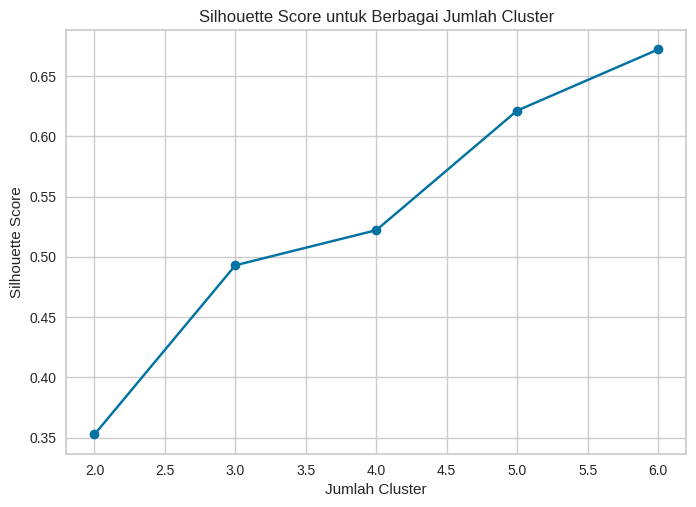

In [26]:

range_n_clusters = [2, 3, 4, 5, 6]

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, silhouette score adalah {silhouette_avg}")

# Plot Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Berbagai Jumlah Cluster")
plt.show()

In [27]:

best_silhouette_score = max(silhouette_scores)
best_n_clusters = range_n_clusters[silhouette_scores.index(best_silhouette_score)]

print(f"The best silhouette score is {best_silhouette_score} with {best_n_clusters} clusters.")


kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_


analyze_clusters(X, labels, best_n_clusters)

The best silhouette score is 0.6721244860109071 with 6 clusters.
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Workout Frequency (days/week): -0.78
Rata-rata Experience Level: 0.22

Cluster 2:
Rata-rata Workout Frequency (days/week): 1.06
Rata-rata Experience Level: 0.36

Cluster 3:
Rata-rata Workout Frequency (days/week): -0.35
Rata-rata Experience Level: -1.14

Cluster 4:
Rata-rata Workout Frequency (days/week): -0.31
Rata-rata Experience Level: 1.59

Cluster 5:
Rata-rata Workout Frequency (days/week): 1.01
Rata-rata Experience Level: -1.14

Cluster 6:
Rata-rata Workout Frequency (days/week): -1.42
Rata-rata Experience Level: -1.14


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:

from sklearn.feature_selection import SelectKBest, f_classif


k = 2
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(df_lencoder, labels)

selected_features = df_lencoder.columns[selector.get_support()]

print("Fitur terpilih:", selected_features)


kmeans_new = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans_new.fit(X_new)
labels_new = kmeans_new.labels_
silhouette_avg_new = silhouette_score(X_new, labels_new)

print(f"Silhouette score setelah feature selection: {silhouette_avg_new}")
print(f"Silhouette score sebelum feature selection: {best_silhouette_score}")
print(f"Perubahan silhouette score: {silhouette_avg_new - best_silhouette_score}")

Fitur terpilih: Index(['Workout_Frequency (days/week)', 'Experience_Level'], dtype='object')
Silhouette score setelah feature selection: 0.6721244860109071
Silhouette score sebelum feature selection: 0.6721244860109071
Perubahan silhouette score: 0.0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

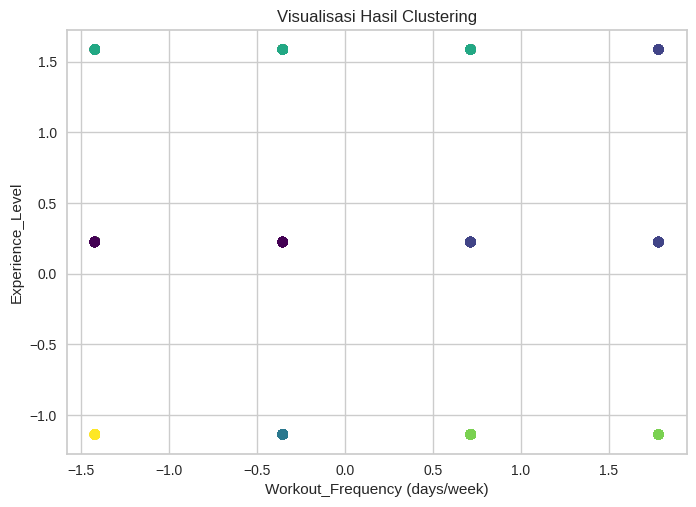

In [29]:

import matplotlib.pyplot as plt

# Visualisasi hasil clustering dengan scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel("Workout_Frequency (days/week)")
plt.ylabel("Experience_Level")
plt.title("Visualisasi Hasil Clustering")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [30]:
def analyze_and_interpret_clusters(X, labels, k, features):

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]
        print(f"\nCluster {cluster_id + 1}:")

        for i, feature in enumerate(features):
            mean_value = cluster_data[:, i].mean()
            print(f"  - Rata-rata {feature}: {mean_value:.2f}")

        # Add your interpretation here based on the cluster characteristics
        # Example interpretation:
        if cluster_id == 0:
            print("  - Interpretasi: Cluster ini mungkin merepresentasikan pengguna dengan frekuensi olahraga rendah dan pengalaman pemula.")
        elif cluster_id == 1:
            print("  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga tinggi dan pengalaman yang mahir.")
        elif cluster_id == 2:
            print("  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga sedang dan pengalaman menengah.")
        elif cluster_id == 3:
            print("  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga rendah dan pengalaman menengah.")
        elif cluster_id == 4:
            print("  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga tinggi dan pengalaman menengah.")
        elif cluster_id == 5:
            print("  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga sedang dan pengalaman pemula.")


# Example usage
analyze_and_interpret_clusters(X, labels, best_n_clusters, ['Workout_Frequency (days/week)', 'Experience_Level'])


Cluster 1:
  - Rata-rata Workout_Frequency (days/week): -0.78
  - Rata-rata Experience_Level: 0.22
  - Interpretasi: Cluster ini mungkin merepresentasikan pengguna dengan frekuensi olahraga rendah dan pengalaman pemula.

Cluster 2:
  - Rata-rata Workout_Frequency (days/week): 1.06
  - Rata-rata Experience_Level: 0.36
  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga tinggi dan pengalaman yang mahir.

Cluster 3:
  - Rata-rata Workout_Frequency (days/week): -0.35
  - Rata-rata Experience_Level: -1.14
  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga sedang dan pengalaman menengah.

Cluster 4:
  - Rata-rata Workout_Frequency (days/week): -0.31
  - Rata-rata Experience_Level: 1.59
  - Interpretasi: Cluster ini mungkin berisi pengguna dengan frekuensi olahraga rendah dan pengalaman menengah.

Cluster 5:
  - Rata-rata Workout_Frequency (days/week): 1.01
  - Rata-rata Experience_Level: -1.14
  - Interpretasi: Cluster ini mungkin ber

In [31]:
df['Kelas GYM'] = labels
df.head()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Max_BPM,Workout_Type,Kelas GYM
0,-0.035152,1.091571,0.994106,0.384736,1.266059,-0.731206,-0.984101,-1.841483,-0.438060,1.782195,0.223870,-0.895092,Female,174,Strength,1
1,-0.688302,0.982713,0.749147,0.648923,1.139167,-1.056193,-0.613287,0.747444,0.129169,1.782195,0.223870,2.488533,Female,166,Strength,1
2,-1.014877,-0.100423,0.912453,1.309388,-0.002864,-0.406219,1.976278,0.884605,-1.147097,-0.354955,0.223870,-1.173827,Male,187,Cardio,0
3,1.597722,0.471081,0.667494,1.507528,-0.764218,0.162509,-1.241525,1.416107,-0.438060,0.713620,-1.138269,0.173978,Female,187,Cardio,4
4,-0.035152,-0.753570,0.014270,1.507528,0.250921,0.568744,0.774965,0.490266,0.696399,0.713620,0.223870,0.255129,Female,177,Strength,1


In [33]:


cluster_mapping = {
    0: "Frekuensi olahraga rendah dan pemula",
    1: "Frekuensi olahraga tinggi dan mahir",
    2: "Frekuensi olahraga sedang dan menengah",
    3: "Frekuensi olahraga rendah dan menengah",
    4: "Frekuensi olahraga tinggi dan menengah",
    5: "Frekuensi olahraga sedang dan pemula",

}

# Map the numerical labels to descriptive cluster names
df['Cluster'] = df['Kelas GYM'].map(cluster_mapping)

# Now 'df' contains a new column 'Cluster' with descriptive cluster names
df.head()

,Age,Weight (kg),Height (m),Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Max_BPM,Workout_Type,Kelas GYM,Cluster
0,-0.035152,1.091571,0.994106,0.384736,1.266059,-0.731206,-0.984101,-1.841483,-0.438060,1.782195,0.223870,-0.895092,Female,174,Strength,1,Frekuensi olahraga tinggi dan mahir
1,-0.688302,0.982713,0.749147,0.648923,1.139167,-1.056193,-0.613287,0.747444,0.129169,1.782195,0.223870,2.488533,Female,166,Strength,1,Frekuensi olahraga tinggi dan mahir
2,-1.014877,-0.100423,0.912453,1.309388,-0.002864,-0.406219,1.976278,0.884605,-1.147097,-0.354955,0.223870,-1.173827,Male,187,Cardio,0,Frekuensi olahraga rendah dan pemula
3,1.597722,0.471081,0.667494,1.507528,-0.764218,0.162509,-1.241525,1.416107,-0.438060,0.713620,-1.138269,0.173978,Female,187,Cardio,4,Frekuensi olahraga tinggi dan menengah
4,-0.035152,-0.753570,0.014270,1.507528,0.250921,0.568744,0.774965,0.490266,0.696399,0.713620,0.223870,0.255129,Female,177,Strength,1,Frekuensi olahraga tinggi dan mahir


Tulis hasil interpretasinya di sini.
1. Cluster 1: Frekuensi olahraga rendah dan pemula
2. Cluster 2: Frekuensi olahraga tinggi dan mahir
3. Cluster 3: Frekuensi olahraga sedang dan menengah
4. Cluster 4: Frekuensi olahraga rendah dan menengah
5. Cluster 5: Frekuensi olahraga tinggi dan menengah
6. Cluster 6: Frekuensi olahraga sedang dan pemula

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [34]:
from google.colab import files
df.to_csv('clustered_gym_data.csv', encoding = 'utf-8-sig')
files.download('clustered_gym_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>